In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import descartes
from shapely import wkt
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings("ignore")

In [18]:
res_union_df = pd.read_csv('map_files/res_union.csv')

In [19]:
res_union_df['geometry'] = res_union_df['geometry'].apply(wkt.loads)
res_union = gpd.GeoDataFrame(res_union_df,geometry='geometry')

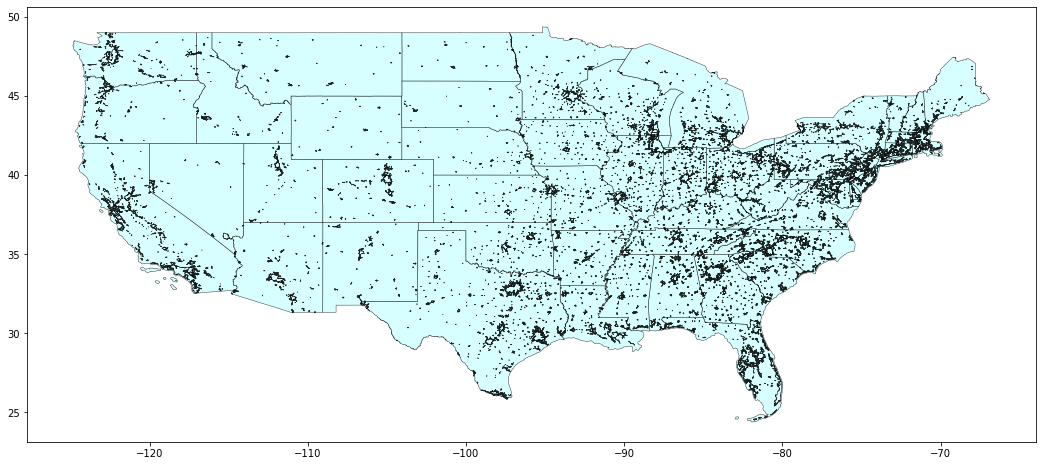

In [20]:
# urban areas on top of state boundaries
res_union.plot(alpha=0.75,color='#ccffff',lw=0.5,edgecolor='black',figsize=(21,8))

In [2]:
# How did we create the res_union file as an overlay of two different shapefiles?

In [3]:
# 1. Urban Areas

In [4]:
ua = gpd.read_file('map_files/tl_2017_us_uac10.shp')

In [5]:
def state_fips(geoid):
    return str(geoid)[:2]

In [6]:
ua['STATEFP'] = ua['GEOID10'].apply(state_fips)
to_omit = ['AS','GU','MP','PR','VI','HI','AK']

In [7]:
all_records = []

for i,v in ua.iterrows():
    if v['NAME10'][-2:] not in to_omit:
        all_records.append(ua.loc[i].values)

ua_us_only = gpd.GeoDataFrame(all_records,dtype=object,
                           columns=['UACE10','GEOID10','NAME10','NAMELSAD10','LSAD10','MTFCC10','UATYP10',
                                    'FUNCSTAT10','ALAND10','AWATER10','INTPTLAT10','INTPTLON10','geometry','STATEFP'],
                            crs = {'init' :'epsg:4326'})
print(len(ua_us_only))

3535


In [8]:
# 2. U.S. and states

In [9]:
states = gpd.read_file('map_files/tl_2017_us_states.shp')

In [10]:
all_records = []

for i,v in states.iterrows():
    if v['STUSPS'] not in to_omit:
        all_records.append(states.loc[i].values)
        
continental_only = gpd.GeoDataFrame(all_records,dtype=object,
                           columns=['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
                                    'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
                                    'geometry'],crs={'init' :'epsg:4326'})
print(len(continental_only))

49


In [14]:
# 'UNION' overlay

In [15]:
%%time
res_union = gpd.overlay(ua_us_only, continental_only, how='union')

CPU times: user 1h 22min 56s, sys: 5min 24s, total: 1h 28min 21s
Wall time: 1h 29min 46s


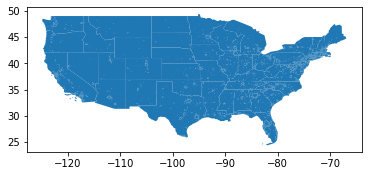

In [16]:
res_union.plot()

In [17]:
res_union_df = pd.DataFrame(res_union, copy=True)
res_union_df.to_csv('map_files/res_union.csv',index=None)